# Integral Equation Model Comparisons
Purpose of this notebook is to EOS calculations for comparisons to CEIMC EOS Hydrogen paper and atoMEC

[https://journals.aps.org/pre/abstract/10.1103/PhysRevE.81.021202](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.81.021202)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")


ModuleNotFoundError: No module named 'mendeleev'


#### Load Morales CEIMC Data

In [2]:
CEIMC_file = "Morales_EOS_CEIMC.dat"
CEIMC_df = read_csv(CEIMC_file, delim_whitespace=True, header=4)
CEIMC_EAU  = CEIMC_df['E[AU]']
CEIMC_rs  = CEIMC_df['rs']
CEIMC_PGPa = CEIMC_df['P[GPa]']
CEIMC_TK   = CEIMC_df['T[K]']
CEIMC_PMbar =  1e-2*CEIMC_PGPa
CEIMC_TeV = CEIMC_TK/eV_to_K

In [3]:
CEIMC_df

,T[K],ρ[g/cm3],rs,E[AU],P[GPa]
0,2000,2.329,1.05,−0.3846,1576
1,3000,2.329,1.05,−0.3777,1607
2,4000,2.329,1.05,−0.3707,1640
3,6000,2.329,1.05,−0.3569,1701
4,8000,2.329,1.05,−0.3458,1753
5,10000,2.329,1.05,−0.3316,1814
6,2000,2.026,1.10,−0.4170,1157
7,3000,2.026,1.10,−0.4097,1190
8,4000,2.026,1.10,−0.4026,1219
9,6000,2.026,1.10,−0.3898,1270


#### Load Morales BOMD Data

In [4]:
BOMD_file = "Morales_EOS_BOMD.dat"
BOMD_df = read_csv(BOMD_file, delim_whitespace=True, header=4)
BOMD_EAU  = BOMD_df['E[AU]']
BOMD_rs  = BOMD_df['rs']
BOMD_PGPa = BOMD_df['P[GPa]']
BOMD_TK   = BOMD_df['T[K]']
BOMD_PMbar =  1e-2*BOMD_PGPa
BOMD_TeV = BOMD_TK/eV_to_K

In [5]:
BOMD_df

,T[K],ρ[g/cm3],rs,E[AU],P[GPa]
0,4000,2.329,1.05,−0.37438,1635.4
1,6000,2.329,1.05,−0.3610,1701.0
2,8000,2.329,1.05,−0.3484,1762.4
3,10000,2.329,1.05,−0.3360,1823.0
4,4000,2.026,1.10,−0.4059,1218.7
5,6000,2.026,1.10,−0.3927,1276.1
6,8000,2.026,1.10,−0.3804,1328.8
7,10000,2.026,1.10,−0.3690,1378.0
8,4000,1.773,1.15,−0.43137,916.5
9,6000,1.773,1.15,−0.41883,964.8


#### Load atoMEC data

In [6]:
atoMEC_file = "atoMEC_H_pressures.dat"
atoMEC_df = read_csv(atoMEC_file, delim_whitespace=True, header=0)
atoMEC_df

,T[eV],rs,P[AU]
0,0.17235,1.05,0.046682
1,0.41796,1.05,0.046722
2,1.01360,1.05,0.046956
3,2.45810,1.05,0.048324
4,5.96100,1.05,0.056139
5,14.45600,1.05,0.094099
6,35.05700,1.05,0.225690
7,85.01800,1.05,0.586500
8,206.18000,1.05,1.492800
9,500.00000,1.05,3.710600


### Set Parameters in Paper and Plot

In [7]:
name = 'Hydrogen'
Z, A = 1,1 

Te_eV_list = np.geomspace(0.172347, 1e3, num=10) #np.array(GP_Te_eV) # eV
Ti_eV_list = Te_eV_list

# ri_cm = rs_from_n(ni_cc)  # cm
ri_AU_list = np.sort(np.array(list(set(CEIMC_rs))))    # AU 
ri_AU_list

array([1.05, 1.1 , 1.15, 1.25, 1.4 , 1.55])

#### Run Ornstein-Zernike Closure

In [22]:
# def plasma_output(plasma):
#     plasma.run_hnc()
#     try: 
#         plasma.hnc.βu_r_matrix[1,1] -= plasma.βP_ee
#     except:
#         plasma.hnc.βu_r_matrix[1,1] -= plasma.qsp.βv_Pauli(plasma.hnc.r_array, plasma.qsp.Λee)
#     Pe_hnc_id, Pe_hnc_ex   = plasma.hnc.rho[1]*plasma.hnc.Temp_list[1],  np.sum( plasma.hnc.excess_pressure_matrix(),axis=1 )[1] 
#     try: 
#         plasma.hnc.βu_r_matrix[1,1] += plasma.βP_ee
#     except:
#         plasma.hnc.βu_r_matrix[1,1] += plasma.qsp.βv_Pauli(plasma.hnc.r_array, plasma.qsp.Λee)
    
#     Pe_Mbar_id, Pe_Mbar_ex = P_hnc_to_Mbar(Pe_hnc_id, plasma.qsp.ri), P_hnc_to_Mbar(Pe_hnc_ex, plasma.qsp.ri)
#     Pe_Mbar = Pe_Mbar_id + Pe_Mbar_ex
#     return Pe_Mbar_id, Pe_Mbar_ex, Pe_Mbar

def plasma_output(plasma):
    plasma.run_hnc()
    try: 
        plasma.hnc.βu_r_matrix[1,1] -= plasma.βP_ee
    except:
        plasma.hnc.βu_r_matrix[1,1] -= plasma.qsp.βv_Pauli(plasma.hnc.r_array, plasma.qsp.Λee)
    # Make pressures
    Pe_hnc_id, Pe_hnc_ex   = plasma.hnc.rho[1]*plasma.hnc.Temp_list[1],  np.sum( plasma.hnc.excess_pressure_matrix(),axis=1 )[1] 
    Pi_hnc_id, Pi_hnc_ex   = plasma.hnc.rho[0]*plasma.hnc.Temp_list[0],  np.sum( plasma.hnc.excess_pressure_matrix(),axis=1 )[0] 
    try: 
        plasma.hnc.βu_r_matrix[1,1] += plasma.βP_ee
    except:
        plasma.hnc.βu_r_matrix[1,1] += plasma.qsp.βv_Pauli(plasma.hnc.r_array, plasma.qsp.Λee)
    
    Pe_Mbar = P_hnc_to_Mbar(Pe_hnc_id + Pe_hnc_ex, plasma.qsp.ri) 
    Pi_Mbar = P_hnc_to_Mbar(Pi_hnc_id + Pi_hnc_ex, plasma.qsp.ri) 
    
    return Pe_Mbar, Pi_Mbar, Pe_Mbar + Pi_Mbar 

name1 = 'OZ - g'
plasma1 = lambda T_eV, ni_cc: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})
name2 = 'OZ - th'
plasma2 = lambda T_eV, ni_cc: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'thermal'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})
name3 = 'OZ - th  Pauli'
plasma3 = lambda T_eV, ni_cc: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Z, find_βuee=True,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'thermal'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})
name4 = 'SVT - th'
plasma4 =  lambda T_eV, ni_cc: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'svt'},
                 hnc_solve_options={'alpha_Picard':0.5,'num_iterations':1e4})


P_hnc_to_AU   = lambda P_hnc, ri: (P_hnc/ri**3) 
P_hnc_to_bar  = lambda P_hnc, ri: P_hnc_to_AU(P_hnc, ri) *  AU_to_bar 
P_hnc_to_Mbar = lambda P_hnc, ri: 1e-6*P_hnc_to_bar(P_hnc, ri)
P_hnc_to_GPa  = lambda P_hnc, ri:  P_hnc_to_bar(P_hnc, ri) * 1e5 / 1e9 

### Compute all plasma models for list of densities

In [23]:
P_list_1 = []
P_list_2 = []
P_list_3 = []
P_list_4 = []

for T_eV in Te_eV_list:
    for rs in ri_AU_list:
        ni_cc = n_from_rs(rs)*cm_to_AU**3
        #1
        # plasma = plasma1(T_eV, ni_cc)
        # Pe_id, Pe_ex, Pe = plasma_output(plasma)
        # P_list_1.append( [Pe_id, Pe_ex, Pe] )
        #2
        # plasma = plasma2(T_eV, ni_cc)
        # Pe_id, Pe_ex, Pe = plasma_output(plasma)
        # P_list_2.append( [Pe_id, Pe_ex, Pe] )
        #3
        plasma = plasma3(T_eV, ni_cc)
        Pe, Pi, P = plasma_output(plasma)
        P_list_3.append( [Pe, Pi, P] )
        #4
        # plasma = plasma4(T_eV, ni_cc)
        # Pe_id, Pe_ex, Pe = plasma_output(plasma)
        # P_list_4.append( [Pe_id, Pe_ex, Pe] )
    

Te_in_eV: 0.172
Ti_in_eV: 0.172
0: Initial condition Total Error: 1.283e+01
Exiting status 0, reverting to best index so far: 1036
Final iter:1037, Total Error: 9.874e-09
Te_in_eV: 0.172
Ti_in_eV: 0.172
0: Initial condition Total Error: 1.244e+01
Exiting status 0, reverting to best index so far: 993
Final iter:994, Total Error: 9.969e-09
Te_in_eV: 0.172
Ti_in_eV: 0.172
0: Initial condition Total Error: 1.208e+01
Exiting status 0, reverting to best index so far: 954
Final iter:955, Total Error: 9.998e-09
Te_in_eV: 0.172
Ti_in_eV: 0.172
0: Initial condition Total Error: 1.143e+01
Exiting status 0, reverting to best index so far: 886
Final iter:887, Total Error: 9.877e-09
Te_in_eV: 0.172
Ti_in_eV: 0.172
0: Initial condition Total Error: 1.060e+01
Exiting status 0, reverting to best index so far: 801
Final iter:802, Total Error: 9.841e-09
Te_in_eV: 0.172
Ti_in_eV: 0.172
0: Initial condition Total Error: 9.900e+00
Exiting status 0, reverting to best index so far: 732
Final iter:733, Total E

/home/zach/plasma/hnc/hnc/PIE.py:182: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  κ = 3*(2*self.qsp.Te*m_e) / (self.qsp.k_F**3 * r) *quad(integrand, 0, t_max)[0]


0: Initial condition Total Error: 2.989e-01
Exiting status 0, reverting to best index so far: 34
Final iter:35, Total Error: 7.434e-09
Te_in_eV: 21.247
Ti_in_eV: 21.247
0: Initial condition Total Error: 2.899e-01
Exiting status 0, reverting to best index so far: 33
Final iter:34, Total Error: 7.809e-09
Te_in_eV: 21.247
Ti_in_eV: 21.247
0: Initial condition Total Error: 2.823e-01
Exiting status 0, reverting to best index so far: 32
Final iter:33, Total Error: 8.510e-09
Te_in_eV: 21.247
Ti_in_eV: 21.247
0: Initial condition Total Error: 2.707e-01
Exiting status 0, reverting to best index so far: 31
Final iter:32, Total Error: 6.772e-09
Te_in_eV: 21.247
Ti_in_eV: 21.247
0: Initial condition Total Error: 2.605e-01
Exiting status 0, reverting to best index so far: 29
Final iter:30, Total Error: 7.548e-09
Te_in_eV: 21.247
Ti_in_eV: 21.247
0: Initial condition Total Error: 2.565e-01
Exiting status 0, reverting to best index so far: 28
Final iter:29, Total Error: 6.072e-09
Te_in_eV: 55.650
Ti_

/home/zach/plasma/hnc/hnc/PIE.py:182: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  κ = 3*(2*self.qsp.Te*m_e) / (self.qsp.k_F**3 * r) *quad(integrand, 0, t_max)[0]


0: Initial condition Total Error: 1.256e-01
Exiting status 0, reverting to best index so far: 25
Final iter:26, Total Error: 6.025e-09
Te_in_eV: 55.650
Ti_in_eV: 55.650
0: Initial condition Total Error: 1.237e-01
Exiting status 0, reverting to best index so far: 25
Final iter:26, Total Error: 5.157e-09
Te_in_eV: 55.650
Ti_in_eV: 55.650
0: Initial condition Total Error: 1.222e-01
Exiting status 0, reverting to best index so far: 24
Final iter:25, Total Error: 8.958e-09
Te_in_eV: 55.650
Ti_in_eV: 55.650
0: Initial condition Total Error: 1.200e-01
Exiting status 0, reverting to best index so far: 24
Final iter:25, Total Error: 7.410e-09
Te_in_eV: 55.650
Ti_in_eV: 55.650
0: Initial condition Total Error: 1.179e-01
Exiting status 0, reverting to best index so far: 24
Final iter:25, Total Error: 6.177e-09
Te_in_eV: 55.650
Ti_in_eV: 55.650
0: Initial condition Total Error: 1.166e-01
Exiting status 0, reverting to best index so far: 24
Final iter:25, Total Error: 5.562e-09
Te_in_eV: 145.762
Ti

Now Plot 

In [24]:
P_list_1 = np.array(P_list_1)
P_list_2 = np.array(P_list_2)
P_list_3 = np.array(P_list_3)
P_list_4 = np.array(P_list_4)

In [25]:
atoMEC_df[atoMEC_df['rs'] == ri_AU_list[1] ]['P[AU]']*AU_to_bar/1e6

10      9.856627
11      9.867807
12      9.933416
13     10.317066
14     12.494221
15     22.743912
16     57.117950
17    149.961834
18    382.296615
19    950.004439
Name: P[AU], dtype: float64

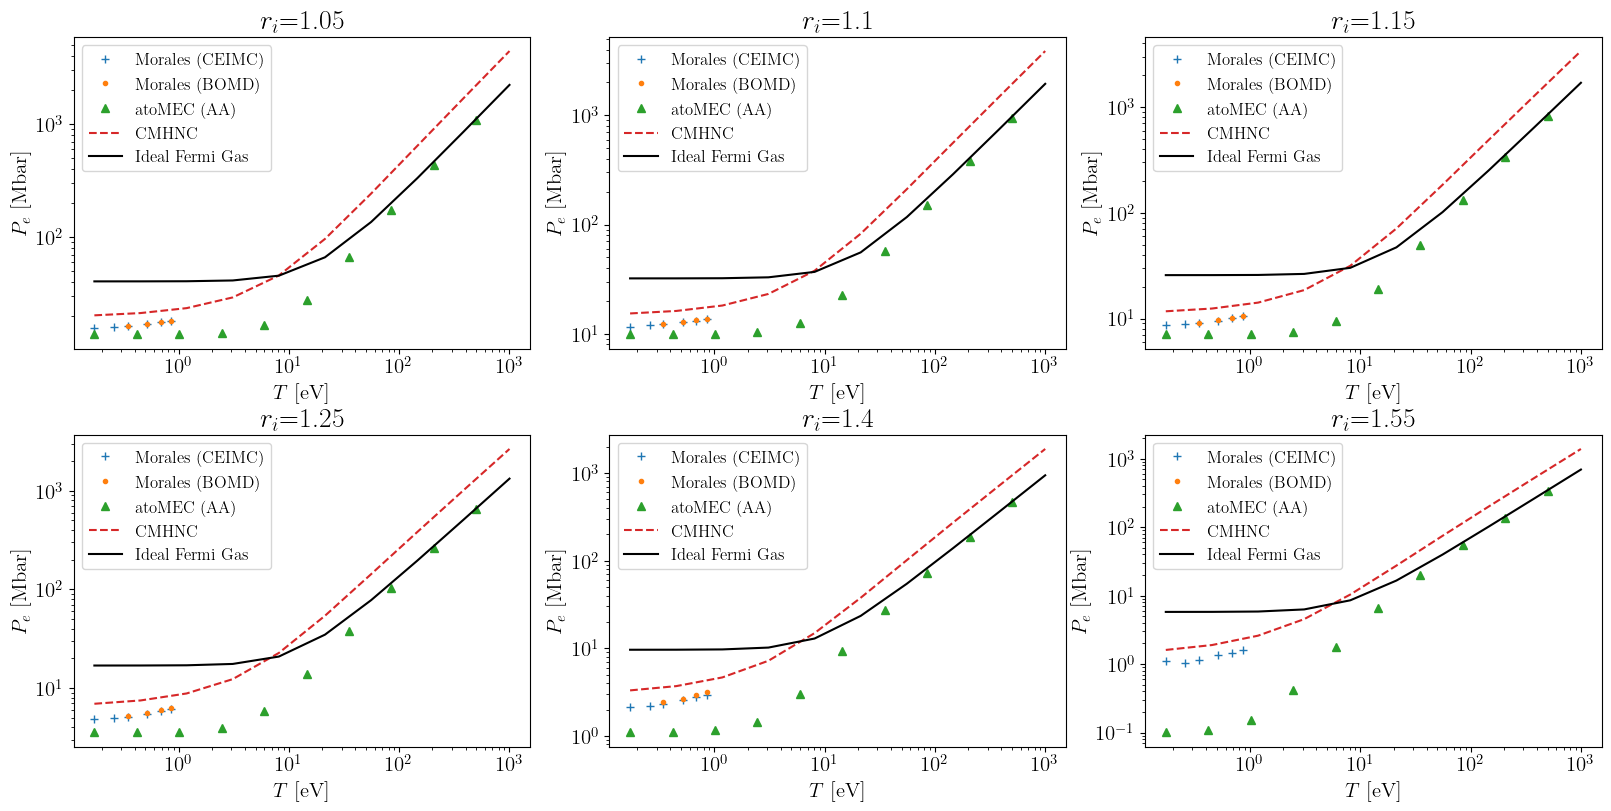

In [26]:
from hnc.hnc.misc import P_Ideal_Fermi_Gas

fig, axs = plt.subplots(2,3, figsize=(16,8))
axs = axs.flatten()

for i, ax in enumerate(axs):
    rs = ri_AU_list[i]
    ni_AU = n_from_rs(rs)
    #Plot CEIMC data
    CEIMC_PMbar = CEIMC_df[CEIMC_df['rs'] == ri_AU_list[i] ]['P[GPa]']*1e-2
    CEIMC_TeV = CEIMC_df[CEIMC_df['rs'] == ri_AU_list[i] ]['T[K]']/eV_to_K
    ax.plot(CEIMC_TeV, CEIMC_PMbar, '+', label='Morales (CEIMC)')

    #Plot BOMD data
    BOMD_PMbar = BOMD_df[BOMD_df['rs'] == ri_AU_list[i] ]['P[GPa]']*1e-2
    BOMD_TeV = BOMD_df[BOMD_df['rs'] == ri_AU_list[i] ]['T[K]']/eV_to_K
    ax.plot(BOMD_TeV, BOMD_PMbar, '.', label='Morales (BOMD)')

    #Plot atoMEC data
    atoMEC_PMbar = atoMEC_df[atoMEC_df['rs'] == ri_AU_list[i] ]['P[AU]']*AU_to_bar/1e6
    atoMEC_TeV = atoMEC_df[atoMEC_df['rs'] == ri_AU_list[i] ]['T[eV]']
    ax.plot(atoMEC_TeV, atoMEC_PMbar, '^', label='atoMEC (AA)')

    # Plot Pressure ratio
    # axs[0].plot(GP_Te_eV, P_list_1[:,2], label=name1)
    # axs[0].plot(Te_eV_list, P_list_2[:,2], label=name2)
    # ax.plot(Te_eV_list, P_list_3.reshape( 10,len(ri_AU_list), 3)[:,i,2],'--', label=name3)
    ax.plot(Te_eV_list, P_list_3.reshape( 10,len(ri_AU_list), 3)[:,i,2],'--', label="CMHNC")
    # axs[0].plot(Te_eV_list, P_list_4[:,2],'--.', label=name4)

    # Plot Fermi Pressure
    ax.plot(Te_eV_list, [P_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ni_AU)*AU_to_bar/1e6 for Te_eV in Te_eV_list],'k-', label="Ideal Fermi Gas"  ) 

    ax.set_title(r"$r_i$={}".format(rs), fontsize=20)
    
    ax.legend(fontsize=12, loc='upper left')
    ax.set_xscale('log')
    # ax.set_yscale('symlog', linthresh=1)
    ax.set_yscale('log')
    # ax.set_ylim(0, 1e4)
    ax.set_ylabel(r"$P_e$ [Mbar]", fontsize=15)
    ax.set_xlabel(r"$T$ [eV]", fontsize=15)
    ax.tick_params(labelsize=15)
    
    plt.tight_layout(pad=0.1)